# $\underline{Импорт\;основных\;библиотек}$

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.stats import *
from math import sqrt
import random
from IPython.display import display, Math
from time import time 
import pandas as pd

# $\underline{Квантили\;основной\;сатистики\;критерия\;Саркади}$ 
### $\cdot$Вывод программы (output: [0.1...0.9] + quantiles.csv([0.001...0.999])) 

In [9]:
from functools import reduce
t1 = time()

N = 1000
means = []
main_stat = []
for i in range(N):
    ## Сформируем выборку из нормального распределения объемом 200:
    X = norm(0,1).rvs(size = 248)
    n = len(X)
    ## Выберем в качестве m = :
    m = round(n/2)
    ## Сформируем случайную величину Y = [ym...yn-1]:
    Y = [elem - 1/(n+sqrt(n)) * sum(X) - 1/(sqrt(n)+1)*X[m]  for elem in X[m:]]
    ## Сформируем статистику Z:
    Z = [Y[j] * (1/(n-j-1) * sum([Y[iter]**2 for iter in range(1,len(Y)-1)]) )**(-0.5) for j in range(0,len(Y))]
    ## Создадим величины r_i
    R = [t(n - j - 1).cdf(Z[j]) for j in range(len(Z))]
    ## Таким образом, имея распределение случайной величины R
    ## необходимо доказать, что R ~ U([0,1]).
    main_stat.append(R)
    means.append(np.mean(R))
    
quantiles = [round(elem,3) for elem in np.arange(0.001,1,0.001)]
quant_values = [np.quantile(main_stat,elem) for elem in quantiles]

df = pd.DataFrame({
    "Квантиль" : quantiles, 
    "Значение" : quant_values
})
qout = [round(iter,1) for iter in np.arange(0.1,1,0.1)]
df_output = pd.DataFrame({
    "Квантиль" : qout,
    "Значение" : [np.quantile(main_stat,elem) for elem in qout]
})

df.to_csv("quantiles999")

    
display(Math(r'Стандартная\;ошибка:\;\sigma(\overline{X})\;=\;' + str(np.std(means))))
display(df_output)
    
    
    
   


<IPython.core.display.Math object>

,Квантиль,Значение
0,0.1,0.059574
1,0.2,0.152434
2,0.3,0.261836
3,0.4,0.380290
4,0.5,0.501382
5,0.6,0.621842
6,0.7,0.739497
7,0.8,0.848461
8,0.9,0.941505


# $\underline{Проверка\;критерия\;согласия\;Саркади}$ 
### $\cdot$ На основе модельных данных $X \sim N(0,1) = Z(0,1)$ - стандартное нормальное распределение 
### с $E(X)=0$ и $Var(X)=1$
### $\cdot$ С использование критерия Колмогорова-Смирнова на основе P-value

<IPython.core.display.Math object>

<IPython.core.display.Javascript object>


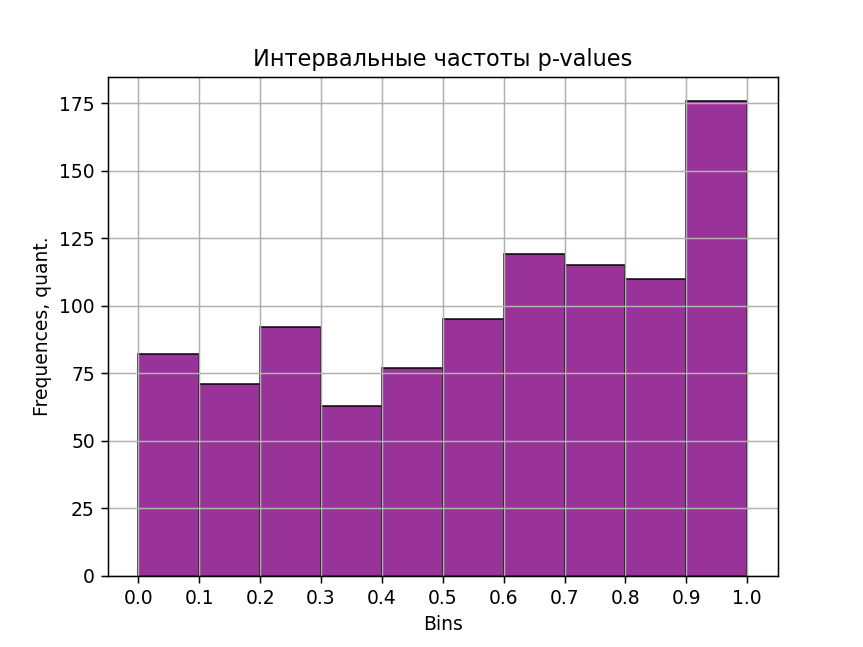

Время выполнения программы: 268.0967848300934


In [4]:
%matplotlib notebook 
N = 50

p_values = []
t1 = time()
for quant in range(1000):
    
    ## Сформируем выборку из нормального распределения объемом 200:
    X = np.random.normal(
        0,
        1,
        200
    )
    
    n = len(X)

    ## Выберем в качестве m = :
    m = 68

    ## Сформируем случайную величину Y = [ym...yn-1]:
    Y = [elem - 1/(n+sqrt(n)) * sum(X) - 1/(sqrt(n)+1)*X[m]  for elem in X[m:]]

    ## Сформируем статистику Z:
    Z = [Y[j] * (1/(n-j-1) * sum([Y[iter]**2 for iter in range(1,len(Y)-1)]) )**(-0.5) for j in range(0,len(Y))]

    ## Создадим величины r_i
    R = [t(n - j - 1).cdf(Z[j]) for j in range(len(Z))]

    ## Таким образом, имея распределение случайной величины R
    ## необходимо доказать, что R ~ U([0,1]).
    ## Создадим равномерное распределение с помощью rando.random() объема len(R)

    Universial = [random.random() for iter in range(len(R))]
    
    p_values.append(ks_2samp(R,Universial)[1])



display(Math(r"P-value:\;" + str(np.mean(p_values))))
plt.grid()
plt.title("Интервальные частоты p-values")
plt.xlabel("Bins")
plt.ylabel("Frequences, quant.")
plt.xticks([round(iter,1) for iter in np.arange(0,1.1,0.1)],[round(iter,1) for iter in np.arange(0,1.1,0.1)])

## Построение гистограммы интервальных частот
plt.hist(
    p_values,histtype = 'bar', 
    align = 'mid', 
    alpha = 0.8, 
    bins = [x for x in np.arange(0,1.1,0.1)],
    edgecolor='k',
    color = 'purple')

print("Время выполнения программы: " + str(time()-t1))


<IPython.core.display.Javascript object>


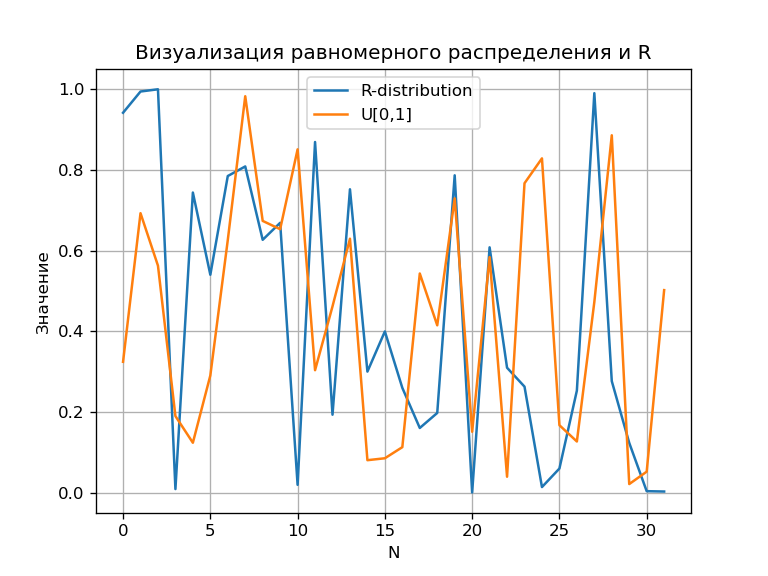

Время выполнения программы:  0.14959931373596191


In [9]:
%matplotlib notebook 



p_values = []
t1 = time()

    
## Сформируем выборку из нормального распределения объемом 200:
X = np.random.normal(
    0,
    1,
    100
)

n = len(X)

## Выберем в качестве m = :
m = 68

## Сформируем случайную величину Y = [ym...yn-1]:
Y = [elem - 1/(n+sqrt(n)) * sum(X) - 1/(sqrt(n)+1)*X[m]  for elem in X[m:]]

## Сформируем статистику Z:
Z = [Y[j] * (1/(n-j-1) * sum([Y[iter]**2 for iter in range(1,len(Y)-1)]) )**(-0.5) for j in range(0,len(Y))]

## Создадим величины r_i
R = [t(n - j - 1).cdf(Z[j]) for j in range(len(Z))]

## Визуализируем распределение R_i и равномерное распределение U([0,1])
Universial = [random.random() for iter in range(len(R))]

plt.grid()
plt.xlabel("N")
plt.ylabel("Значение")
plt.title("Визуализация равномерного распределения и R")
plt.plot(R, label = "R-distribution")
plt.plot(Universial, label = "U[0,1]")
plt.legend()
print("Время выполнения программы: ", time() - t1)